In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import svm

# Data

In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
# Visualizar as primeiras linhas
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# DataShape
df.shape

(918, 12)

In [5]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Processing


#### Será preciso transformar os tipos Object para Float ou Int

In [6]:
# Para selecionar somente as que são objetos
object_df = df.select_dtypes(include=['object']).copy()
object_df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [7]:
# Verificar quais e quantas observações possuem em cada classe
for k in object_df:
  print(object_df[k].value_counts(),'\n')


M    725
F    193
Name: Sex, dtype: int64 

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64 

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64 

N    547
Y    371
Name: ExerciseAngina, dtype: int64 

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64 



### One Hot Encoding

In [8]:
# Salvando um data frame que transforma as categóricas em numéricas
Encoded_df = pd.get_dummies(object_df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
               prefix=['Sex', 'CPT', 'ECG', 'ExerciseAngina', 'ST'])

In [9]:
# Excluindo o que é objeto para colocar o novo dataframe com OneHotEncoding aplicado
df = df.drop(df.select_dtypes(include=['object']), axis=1)

In [10]:
# Conferindo se a operação acima funcionou corretamente
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           918 non-null    int64  
 1   RestingBP     918 non-null    int64  
 2   Cholesterol   918 non-null    int64  
 3   FastingBS     918 non-null    int64  
 4   MaxHR         918 non-null    int64  
 5   Oldpeak       918 non-null    float64
 6   HeartDisease  918 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 50.3 KB


In [11]:
# Adicionado o Encoded_df ao df principal
df = pd.concat([df, Encoded_df], axis=1)

Normalizando


In [12]:
normalized_df = (df-df.min())/(df.max()-df.min())
df = normalized_df

In [13]:
# Conferindo o novo dataset
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,CPT_ASY,...,CPT_NAP,CPT_TA,ECG_LVH,ECG_Normal,ECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Down,ST_Flat,ST_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [14]:
# Verificando a presença de valores nulos (não assinalados)
df.isnull().sum()

Age                 0
RestingBP           0
Cholesterol         0
FastingBS           0
MaxHR               0
Oldpeak             0
HeartDisease        0
Sex_F               0
Sex_M               0
CPT_ASY             0
CPT_ATA             0
CPT_NAP             0
CPT_TA              0
ECG_LVH             0
ECG_Normal          0
ECG_ST              0
ExerciseAngina_N    0
ExerciseAngina_Y    0
ST_Down             0
ST_Flat             0
ST_Up               0
dtype: int64

In [15]:
# Descrição do dataset
# Formatar a exibição
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,CPT_ASY,...,CPT_NAP,CPT_TA,ECG_LVH,ECG_Normal,ECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Down,ST_Flat,ST_Up
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,...,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,0.52,0.66,0.33,0.23,0.54,0.40,0.55,0.21,0.79,0.54,...,0.22,0.05,0.20,0.60,0.19,0.60,0.40,0.07,0.50,0.43
std,0.19,0.09,0.18,0.42,0.18,0.12,0.50,0.41,0.41,0.50,...,0.42,0.22,0.40,0.49,0.40,0.49,0.49,0.25,0.50,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.39,0.60,0.29,0.00,0.42,0.30,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.53,0.65,0.37,0.00,0.55,0.36,1.00,0.00,1.00,1.00,...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
75%,0.65,0.70,0.44,0.00,0.68,0.47,1.00,0.00,1.00,1.00,...,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Distribuição dos dados

1 → Doença no Coração

0 → Coração Saudável

In [16]:
# Observando a distribuição do target (Doença ou não)
df['HeartDisease'].value_counts()

1.00    508
0.00    410
Name: HeartDisease, dtype: int64

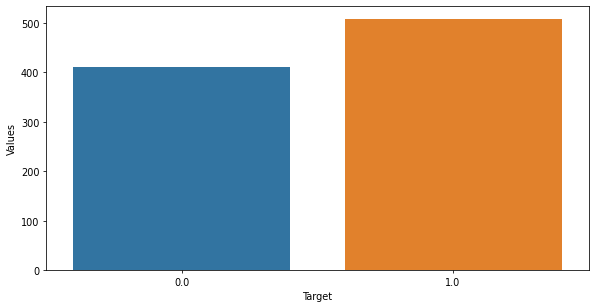

In [17]:
import seaborn as sns
figure(figsize=(10, 5), dpi=70)
dados = df['HeartDisease'].value_counts()
dados_df = pd.DataFrame({'Target': dados.index,'Values': dados.values})
sns.barplot(x = 'Target', y = 'Values', data=dados_df)


Divisão dos dados

In [18]:
target = df['HeartDisease']
features = df.drop(['HeartDisease'], axis=1)

In [19]:
X_train, X_test, Y_train, Y_val = train_test_split(features, target, test_size=0.25, stratify=target, random_state=1)

In [20]:
row_number = len(X_train.index) # Só para obter quantas linhas existem na divisão
print('Shape X_train: ', X_train.shape, 
      '\nShape X_test: ', X_test.shape, 
      '\nShape Y_train: ', Y_train.shape, 
      '\nShape Y_val: ', Y_val.shape)

Shape X_train:  (688, 20) 
Shape X_test:  (230, 20) 
Shape Y_train:  (688,) 
Shape Y_val:  (230,)


In [21]:
# Definindo o modelo
model = svm.SVC(decision_function_shape='ovr', probability=True, verbose = True, max_iter = 2000)

## Training


##### Treinando de pouco a pouco, tomando aleatoriamente os dados de treino

In [22]:
# Ordenando de forma crescente pelo índice
X_train = X_train.sort_index(ascending=True)
Y_train = Y_train.sort_index(ascending=True)

In [23]:
incremento = 10
init = 10;

X_train_sample = X_train.sample(n=incremento, random_state = 10)
Y_train_sample = Y_train.sample(n=incremento, random_state = 10)

X_train_sample = X_train_sample.sort_index(ascending=True)
Y_train_sample = Y_train_sample.sort_index(ascending=True)

row_index = X_train_sample.index.tolist()
X_train.drop(row_index, axis = 0, inplace=True)
Y_train.drop(row_index, axis = 0, inplace=True)

In [24]:
df_acc = pd.DataFrame()
samples_passive = pd.DataFrame()
cont = 0

while(len(X_train) > incremento):
  acc = 0

  # Média da acurácia
  for j in range(1,11,1):  
   model.fit(X_train_sample, Y_train_sample)
   predict = model.predict(X_test)
   acc += accuracy_score(predict, Y_val)
  
  df_acc.loc[cont, 'Accuracy'] = acc/10
  samples_passive.loc[cont, 'Samples'] = len(X_train_sample)

  # Salvando as novas amostras a serem inseridas
  get_x_sample = X_train.sample(n=incremento, random_state = 10)
  get_y_sample = Y_train.sample(n=incremento, random_state = 10)

  # Inserindo as novas amostras no novo conjunto de treinamento
  X_train_sample = X_train_sample.append(get_x_sample, ignore_index = False)
  Y_train_sample = Y_train_sample.append(get_y_sample, ignore_index = False)

  # Retirando as novas amostras do conjunto geral de treino
  row_index = get_x_sample.index.tolist()
  X_train.drop(row_index, axis = 0, inplace=True)
  Y_train.drop(row_index, axis = 0, inplace=True)

  # Ordenando de forma crescente pelo índice
  X_train_sample = X_train_sample.sort_index(ascending=True)
  Y_train_sample = Y_train_sample.sort_index(ascending=True)

  cont += 1;
  # Verificando a acurácia
  print('Acurácia do modelo: {:.2f} '.format(acc/10))
 

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.60 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.74 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.78 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.80 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.80 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.79 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.77 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.77 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.78 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSV

Treinando usando Active Learning

In [25]:
X_train, X_test, Y_train, Y_val = train_test_split(features, target, test_size=0.25, stratify=target, random_state = 1)

In [26]:
# Definindo o modelo
model = svm.SVC(decision_function_shape='ovr', probability = True, verbose = True, max_iter = 2000)

In [27]:
stop = 0;
cont = 0;
incremento = 10;
init = 10;

df_acc_active = pd.DataFrame()
samples_active = pd.DataFrame()

# É preciso ordenar os índices
X_train = X_train.sort_index(ascending=True)
Y_train = Y_train.sort_index(ascending=True)

X_train_sample = X_train.sample(n = init, random_state = 10)
Y_train_sample = Y_train.sample(n = init, random_state = 10)

# Ordenando em ordem crescente pelos índices
X_train_sample = X_train_sample.sort_index(ascending=True)
Y_train_sample = Y_train_sample.sort_index(ascending=True)

# ---------- Retirando do X_train e Y_train as amostras iniciais que retirei pra treinar, se não depois posso dar pred_proba nas mesmas amostras
get_index = X_train_sample.index.tolist() # ----- Obtendo os índices que foram retirados como amostra do X_train
X_train.drop(get_index, axis=0, inplace=True)
Y_train.drop(get_index, axis=0, inplace=True)

In [28]:
# A métrica de parada do loop é a acurácia máxima obtida na abordagem passiva
while (stop < df_acc['Accuracy'].max()):
  acc_active = 0;
  tam_amostra = len(X_train_sample.index) # Só para obter quantas linhas existem na divisão (Quantas amostras estou usando)
  row_number = len(X_train.index) # Atualizando o número de linhas no meu dataframe de treino

  for j in range(1,11,1):
    model.fit(X_train_sample, Y_train_sample)
    predict = model.predict(X_test)
    acc_active += accuracy_score(predict, Y_val)
  
  df_acc_active.loc[cont, 'Accuracy'] = acc_active/10
  samples_active.loc[cont, 'Samples'] = tam_amostra # Adicionado ao DF a quantidade de amostras usadas

  pred_prob = model.predict_proba(X_train) # Pois agora o X_train já está sem as amostras usadas na 1ª iteração
  new_x_train_sample = X_train.copy()
  new_y_train_sample = Y_train.copy()
  new_x_train_sample['Predict'] = pred_prob[:,0].tolist()

  # Condição para selecionar novos dados
  new_x_train_sample['Predict']  = (new_x_train_sample['Predict'] - 0.5).abs()
  row_index = new_x_train_sample.index[new_x_train_sample['Predict'] < 0.1].tolist() # Obtendo os índices das linhas que o predict é < 0,1
  
  X_train_sample = X_train_sample.append(X_train.loc[row_index[:incremento]], ignore_index=True) # Adicionando 10 linhas do DF X_train no meu X_train_sample 
  Y_train_sample = Y_train_sample.append(Y_train.loc[row_index[:incremento]], ignore_index=True) # Adicionando 10 linhas do DF Y_train no meu Y_train_sample

  # Agora é preciso obter os 10 índices que foram adicionados e retirá-los do X_train
  X_train.drop(row_index[:incremento], axis=0, inplace=True) # Removendo as linhas pelos índices que foram usados como amostra no X_train_sample
  Y_train.drop(row_index[:incremento], axis=0, inplace=True) # Removendo as linhas pelos índices que foram usados como amostra no Y_train_sample   

  print('Acurácia do modelo: {:.2f} '.format(acc_active/10))    
  cont += 1;
  stop = acc_active/10;

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.60 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.60 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.60 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.60 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.71 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.82 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.83 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.83 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Acurácia do modelo: 0.81 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSV

Comparativo

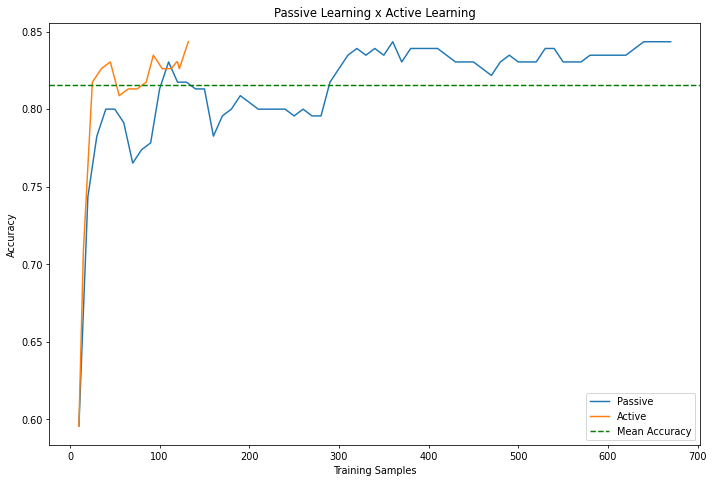

In [30]:
figure(figsize=(12, 8), dpi=70)

# plotting the points 
plt.plot(samples_passive['Samples'], df_acc['Accuracy'], label='Passive')

# plotting the points 
plt.plot(samples_active['Samples'], df_acc_active['Accuracy'], label='Active')  

# Plotting the mean accuracy
plt.axhline(y = df_acc['Accuracy'].mean(), color='g', linestyle = '--', label = 'Mean Accuracy')
 
# giving a title to my graph
plt.title('Passive Learning x Active Learning')

# naming the x axis
plt.xlabel('Training Samples')
# naming the y axis
plt.ylabel('Accuracy')

# Giving a legend to my graph
plt.legend()

# Saving as png
plt.savefig('Comparison.png')

# function to show the plot
plt.show()